In [1]:
import pandas as pd

In [2]:
month2number = {'January': 1, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8,
       'December': 12, 'November': 11, 'February': 2, 'October': 10, 'September': 9}

data_frame = pd.read_csv('database.csv')[['Year', 'Month']]
data_frame['Month'] = data_frame.Month.apply(lambda month: month2number[month])

/home/elfray/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
time_series = data_frame.groupby(['Year', 'Month']).size().reset_index(name='NumCases').sort_values(by=['Year', 'Month'])

In [4]:
time_series.to_csv('time_series.csv', index=False)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [2]:
time_series = pd.read_csv('time_series.csv')

In [3]:
time_series['Date'] = time_series['Year'] + (time_series['Month'] - 1) / 12

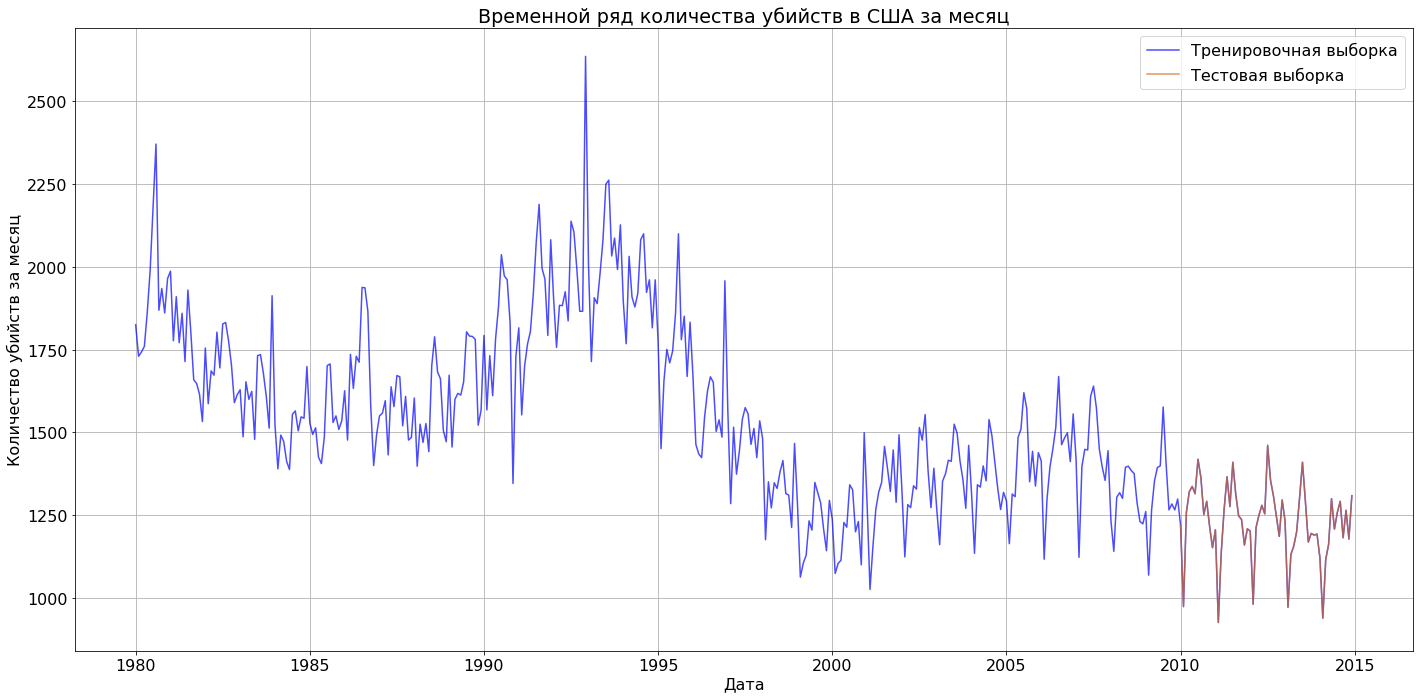

In [22]:
plt.figure(figsize=(20,10))
plt.plot(time_series['Date'], time_series['NumCases'], color='blue', alpha=0.7, label="Тренировочная выборка")
plt.plot(time_series['Date'][-60:], time_series['NumCases'][-60:], color='chocolate', alpha=0.7, label="Тестовая выборка")
plt.title('Временной ряд количества убийств в США за месяц')
plt.grid()
plt.ylabel('Количество убийств за месяц')
plt.xlabel('Дата')
plt.legend()
plt.tight_layout()
plt.show()